---
#  Linear Regression
---

Before there was any ML algorithms, there was a concept and that was regression.Linear regression is most simple and every beginner Data scientist or Machine learning Engineer start with this. Linear regression comes under supervised model where data is labelled. In linear regression we will find relationship between one or more features(independent variables) like x1,x2,x3………xn. and one continuous target variable(dependent variable) like y.



Once the parameter values i.e bias term and theta1 are randomly initialized, the hypothesis function is ready for prediction, and then the error (|predicted value – actual value|) is calculated to check whether the randomly initialized parameter is giving the right prediction or not.

If the error is too high, then the algorithm updates the parameters with a new value, if the error is high again it will update the parameters with the new value again. The algorithm continues this process until the error is minimized. To minimize the error we have a special function called Gradient Descent but before that, we are going to understand what Cost Function is and how it works?

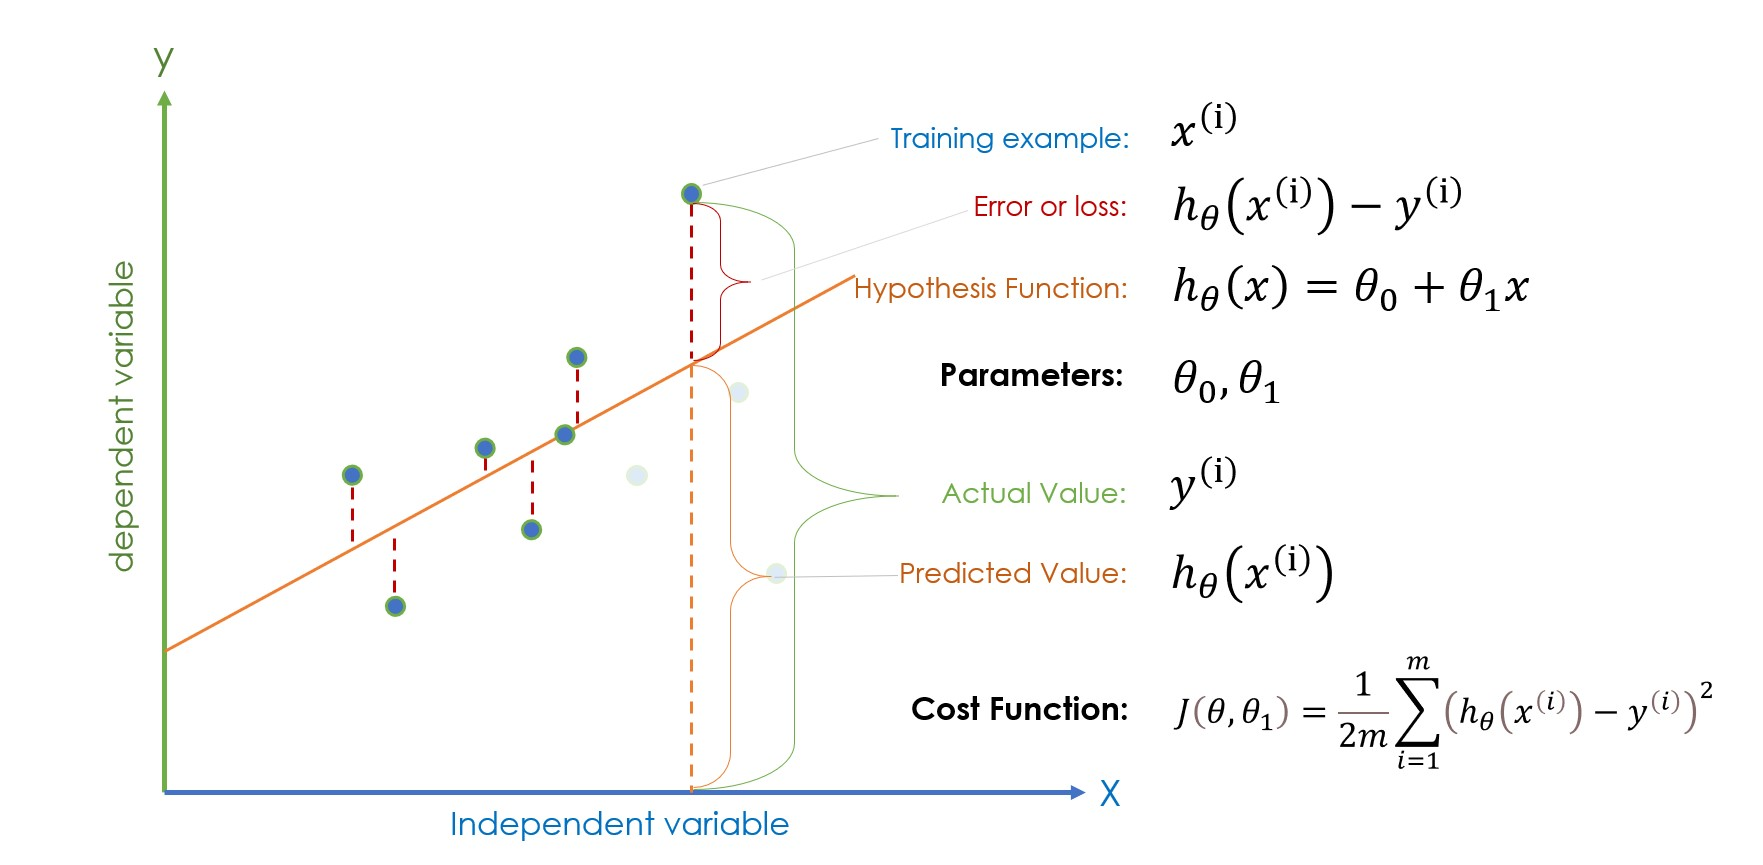

Cost function:
a cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y.


<img src="cost%20function.jpg" width="500"/>

Here in the cost function, we are trying to find the square of the differences between the predicted value and actual value of each training example and then summing up all the differences together or in other words, we are finding the square of error of each training example and then summing up all the errors together. The output we get is simply the mean squared error of a particular set of parameters. 

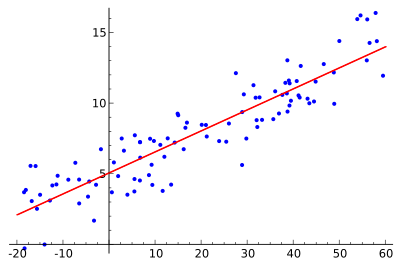

## Task
This project is implemented for a projct of Class 577 Statistic. I finished this project with Chirs, Haoyang, and Carlos. 

In order to do this we will need the following libraries:
- [matplotlib] (https://matplotlib.org/)
- [pandas] (https://pandas.pydata.org/)
- [numpy] (https://numpy.org/)
- [seaborn] (https://seaborn.pydata.org/)
- [scikit-learn] (https://scikit-learn.org/)
...


## Approach and methodology

We will adopt the OSEMiN data science workflow, which involves:

Obtain (import the data)

Scrub (clean the data, deal with missing values and data types)

Explore (answer descriptives questions using EDA)

Model (build our predictive model)

Interpret (comment on our model and findings)

In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns


## Prepare Data and Check information

In [7]:
df = pd.read_csv ('kc_house_data.csv')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Change data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
# change date to datetime formati
df['date'] = pd.to_datetime(df['date'])

In [12]:
# check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Replace Null value

In [14]:
df.isnull().count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [15]:
# Get number of missing values in each column
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Check duplicated values

In [16]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [17]:
# Cheking for rows with same id
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))

177


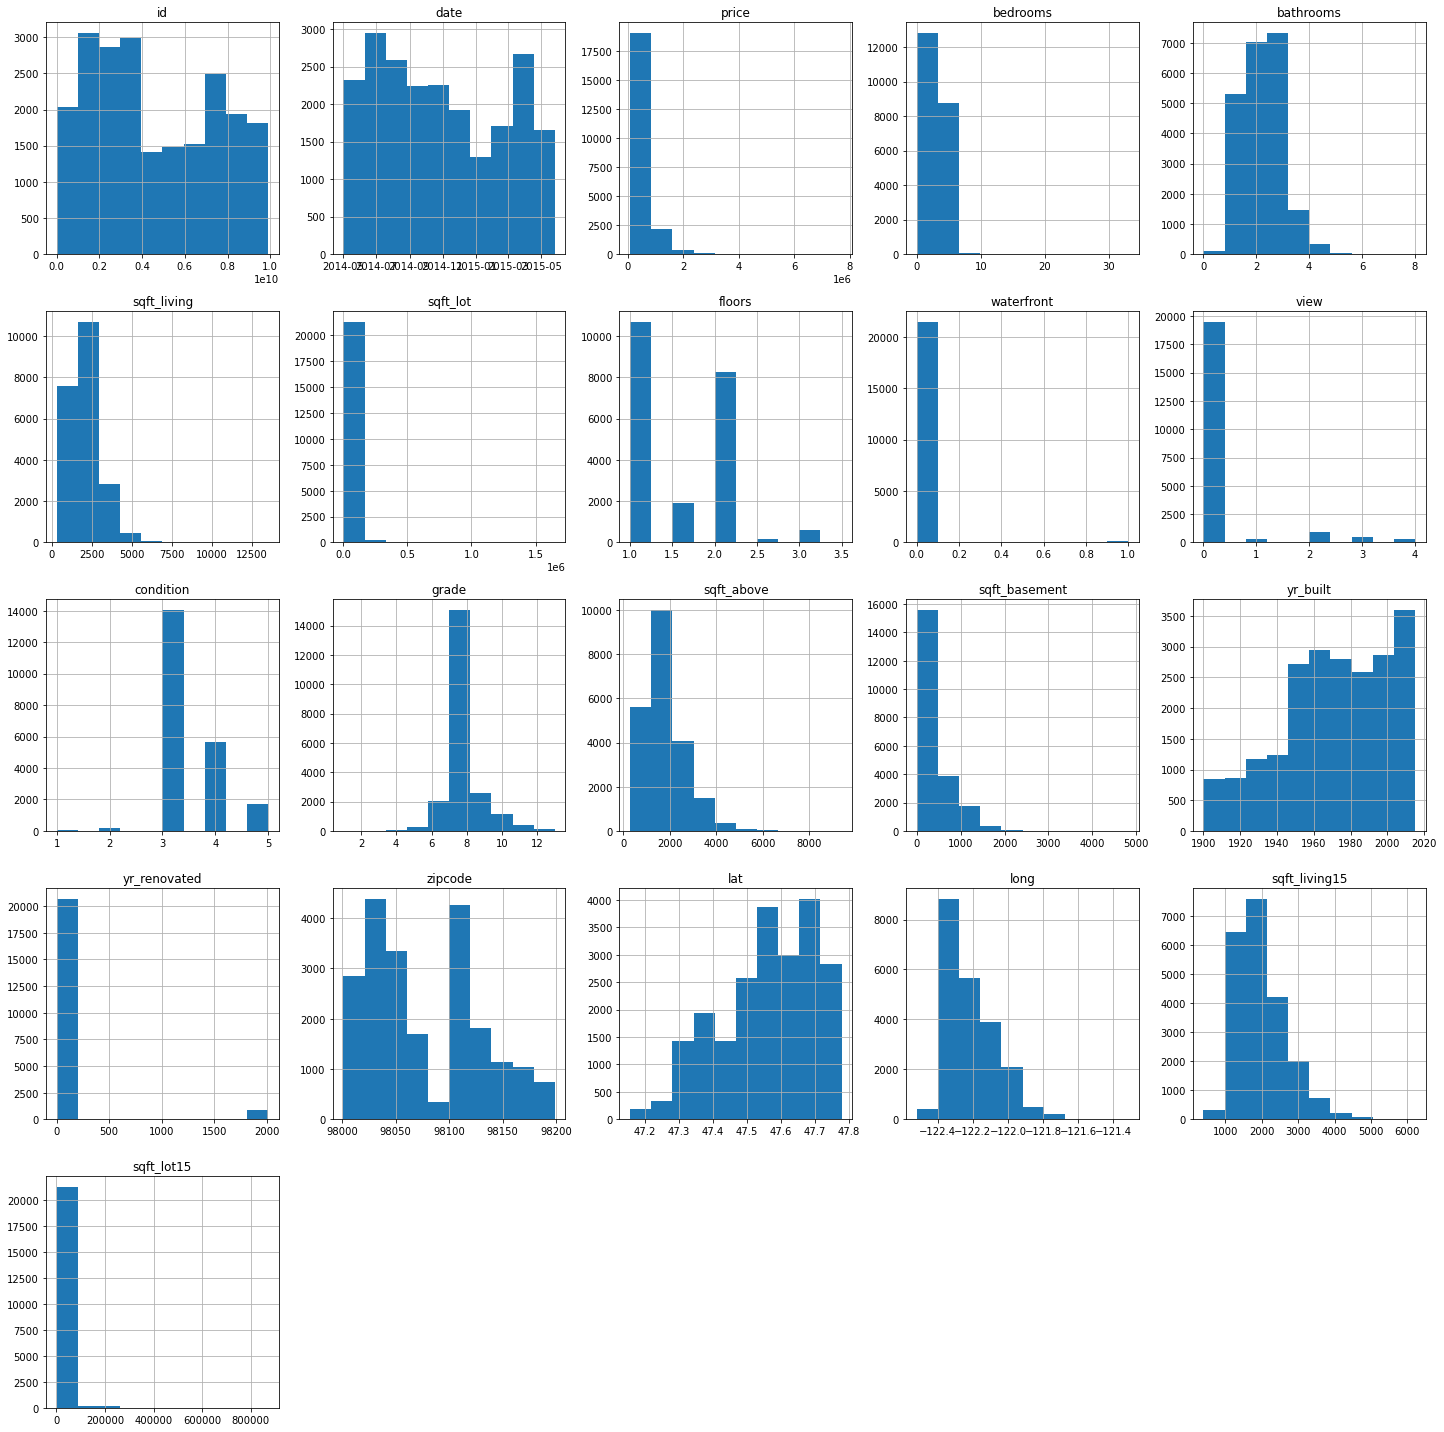

In [18]:
# View the distributions using histograms to get a sense of the spread of the various features.
# How to remove ID and date????

df.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

we note that most of the  price under 3,000,000$, we need remove the outliers;

number of bedrooms should be less than 10; 

number of bathrooms should be less than 6; 

-sqft_living <  7500;

-sqft_lot < 500,000;

-waterfront should be a binary 1/0 feature;

-yr_renovated shold remove value '0';

-sqft_lot15 should < 200,000


We will consider potential outliers in bedrooms, bathrooms and the sqft-type features.

### Investigate bedrooms

In [19]:
# Investigate bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [20]:
# Find the records with bedroom=33
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [21]:
# This 33 should be a typo of 3, and we correct it
# Fix typo for bedrooms
df.loc[15870, 'bedrooms'] = 3

In [22]:
# Check again
df.loc[15870]

id                        2402100895
date             2014-06-25 00:00:00
price                       640000.0
bedrooms                           3
bathrooms                       1.75
sqft_living                     1620
sqft_lot                        6000
floors                           1.0
waterfront                         0
view                               0
condition                          5
grade                              7
sqft_above                      1040
sqft_basement                    580
yr_built                        1947
yr_renovated                       0
zipcode                        98103
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
Name: 15870, dtype: object

### Define function to remove outliers
def remove_outliers(df):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

### Investigate price

In [23]:
df['price'].describe().round(0)

count      21613.0
mean      540088.0
std       367127.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

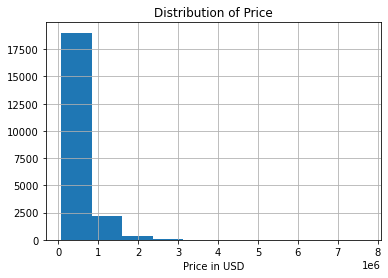

In [24]:
# View price distribution
df['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

In [25]:
# Find the records with price > 4,000,000$
df[df['price'] >= 4000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4149,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [26]:
df_less4 = df[df['price'] <= 4000000]

In [27]:
df_less4['price'].describe().round(0)

count      21602.0
mean      537547.0
std       348598.0
min        75000.0
25%       321500.0
50%       450000.0
75%       645000.0
max      4000000.0
Name: price, dtype: float64

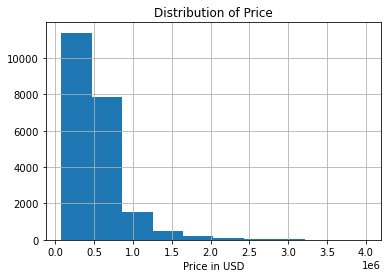

In [28]:
# View price distribution
df_less4['price'].hist()
plt.xlabel('Price in USD')
plt.title ('Distribution of Price')
plt.show()

In [29]:
# Look at 0.9 percentile
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 887000.0
0.91 percentile: 919999.2
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1063560.0
0.95 percentile: 1156480.0
0.96 percentile: 1259040.0
0.97 percentile: 1388000.0
0.98 percentile: 1600000.0
0.99 percentile: 1964400.0


### Investigate sqft_living

In [30]:
df['sqft_living'].describe().round(0)

count    21613.0
mean      2080.0
std        918.0
min        290.0
25%       1427.0
50%       1910.0
75%       2550.0
max      13540.0
Name: sqft_living, dtype: float64

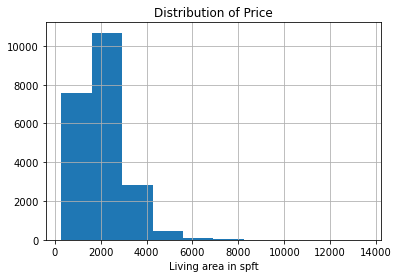

In [31]:
# View price distribution
df['sqft_living'].hist()
plt.xlabel('Living area in spft')
plt.title('Distribution of Price')
plt.show()

In [32]:
# Find the records with sqft_living > 8,000$
df[df['sqft_living'] >= 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2303900035,2014-06-11,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969


### Investigate sqft_lot

In [33]:
df['sqft_lot'].describe().round(0)

count      21613.0
mean       15107.0
std        41421.0
min          520.0
25%         5040.0
50%         7618.0
75%        10688.0
max      1651359.0
Name: sqft_lot, dtype: float64

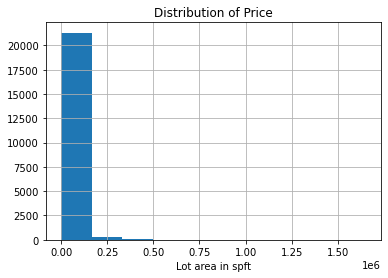

In [34]:
# View price distribution
df['sqft_lot'].hist()
plt.xlabel('Lot area in spft')
plt.title('Distribution of Price')
plt.show()

## Ploting

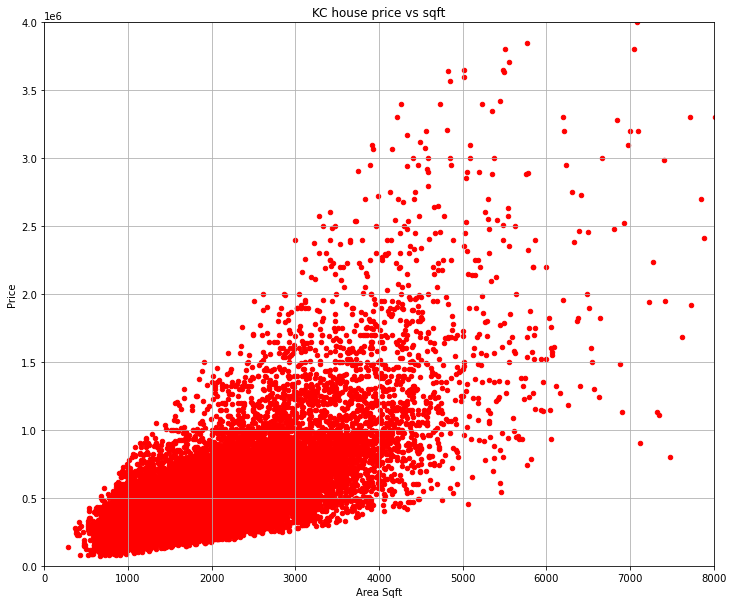

In [35]:
#plt.scatter(df.loc ['sqft_lot'],            df.loc ['price'],             )

df.plot(kind='scatter',x= 'sqft_living',y='price',color='red',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0.0, 8000), ylim=(0, 4000000) )
plt.xlabel('Area Sqft')
plt.ylabel('Price')
plt.title('KC house price vs sqft')
plt.show()

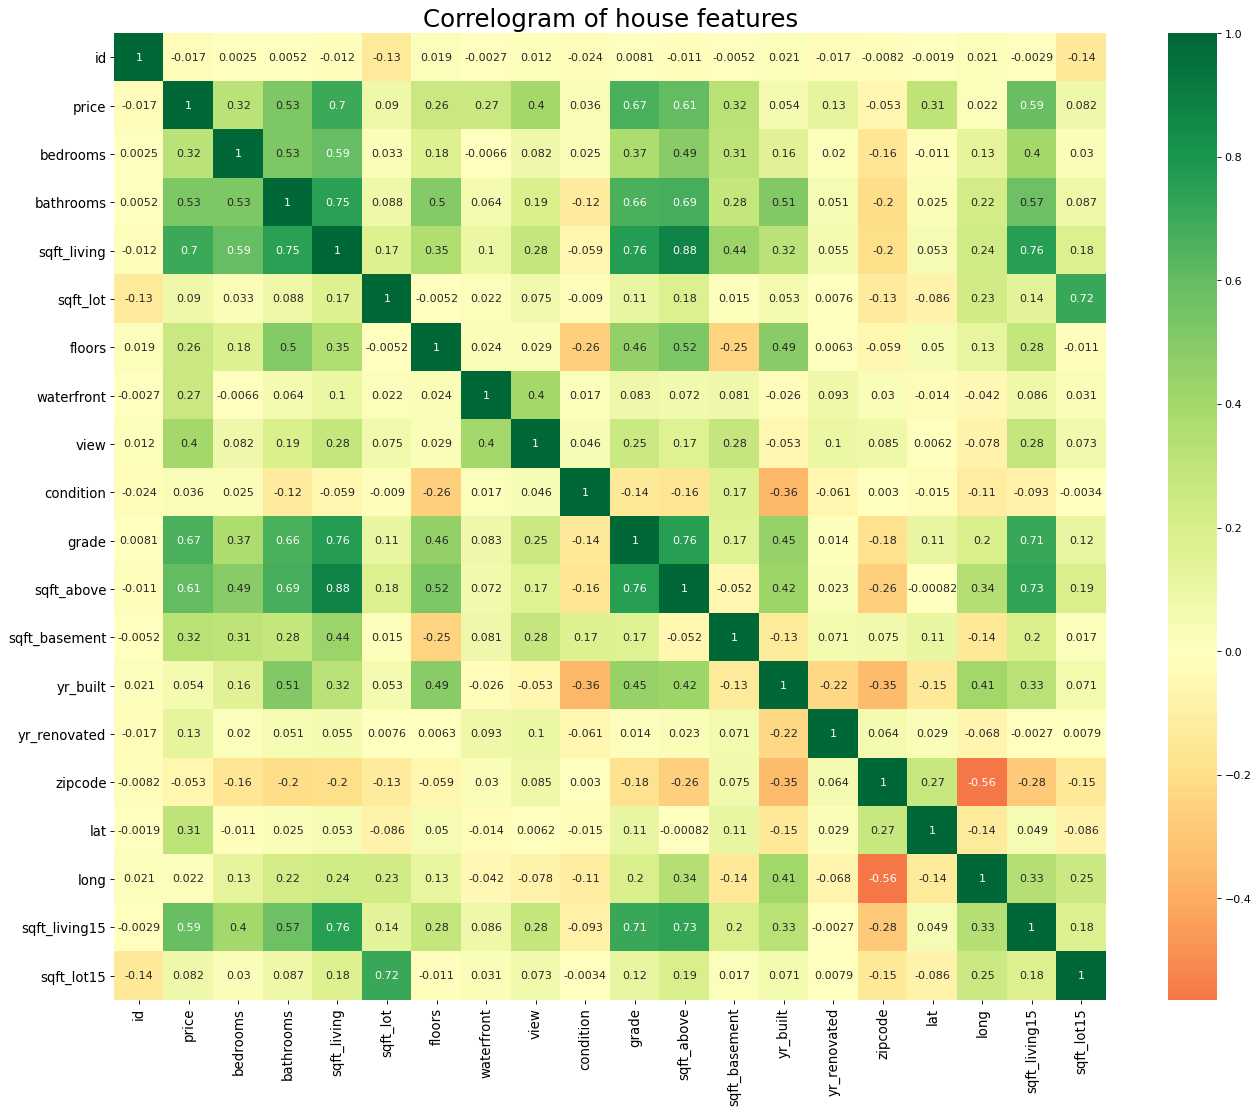

In [36]:
# Plot
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.yticks(fontsize=12)
plt.title('Correlogram of house features', fontsize=22)
plt.xticks(fontsize=12)
plt.show()

In [37]:
# create a copy of df with price less than 2 million
df_less2 = df[df['price'] <= 2000000]

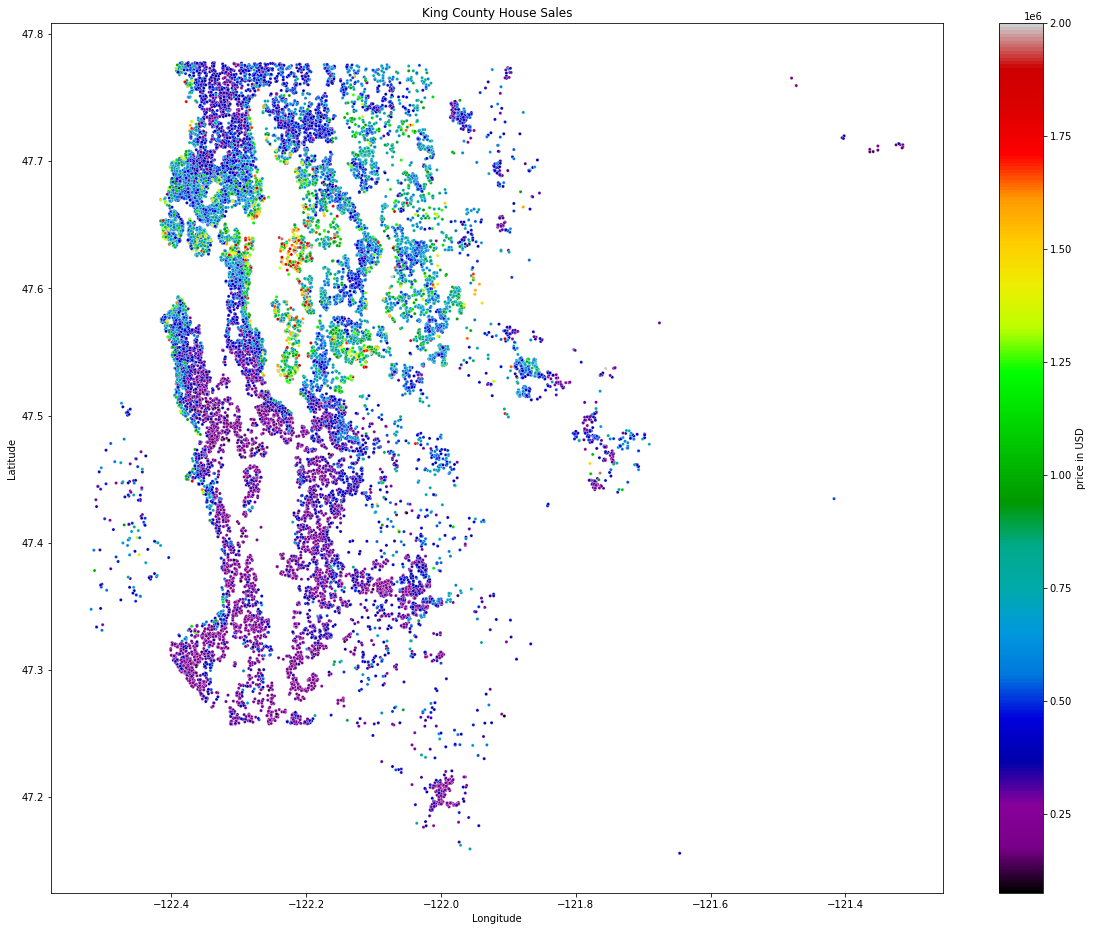

In [38]:
# Plot scatter plot
plt.figure(figsize = (20,16))
ax = sns.scatterplot(x = df_less2['long'], y = df_less2['lat'], hue = df_less2['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = df_less2)

norm = plt.Normalize(df_less2['price'].min(), df_less2['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

### Investigate Zipcode 

In [39]:
df_less2.shape

(21415, 21)

In [40]:
# Explore zipcode
df_less2['zipcode'].value_counts()

98103    602
98038    590
98115    582
98052    573
98117    553
        ... 
98010    100
98102    100
98024     81
98148     57
98039     29
Name: zipcode, Length: 70, dtype: int64

In [41]:
# Extract price and zipcode from our dataset
df_zip = df_less2[['zipcode', 'price']]

In [42]:
df_zip

,zipcode,price
0,98178,221900.0
1,98125,538000.0
2,98028,180000.0
3,98136,604000.0
4,98074,510000.0
...,...,...
21608,98103,360000.0
21609,98146,400000.0
21610,98144,402101.0
21611,98027,400000.0


In [43]:
# Groupby zipcode and take median price
df_zipmean = df_zip.groupby(df_zip['zipcode']).median()

In [44]:
df_zipmean

,price
zipcode,
98001,260000.0
98002,235000.0
98003,267475.0
98004,1032250.0
98005,765475.0
...,...
98177,540000.0
98178,278277.0
98188,264000.0


In [45]:
# Reset index after groupy
df_zipmean = df_zipmean.reset_index()

# Change type to str
df_zipmean['zipcode'] = df_zipmean['zipcode'].astype(str)

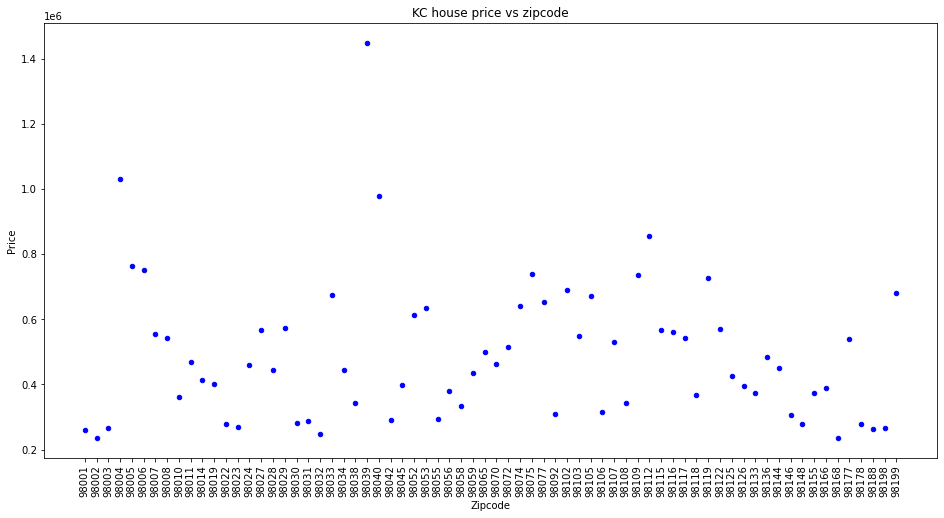

In [46]:
df_zipmean.plot(kind='scatter',x='zipcode', y='price', color='blue',figsize = (16,8))
# sns.scatterplot (x = df_zipmean['price'], y = df_zipmean['zipcode'], data = df_zipmean)
plt.xlabel('Zipcode')
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.title('KC house price vs zipcode')
plt.show()

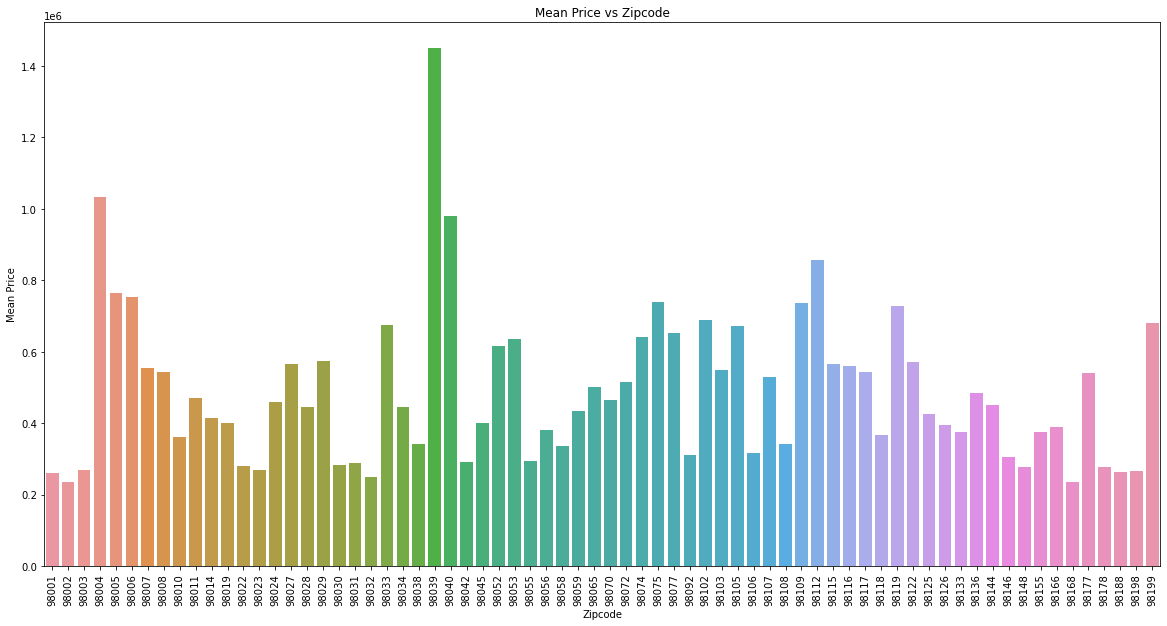

In [49]:
plt.figure(figsize = (20,10))
sns.barplot( x = df_zipmean['zipcode'],y = df_zipmean['price'], data = df_zipmean)
plt.title('Mean Price vs Zipcode')
plt.ylabel('Mean Price')
plt.xlabel('Zipcode')
plt.xticks(rotation = 90)
plt.show()

In [50]:
# Get top 10 zipcode mean prices
dftop10 = df_zipmean.sort_values('price', ascending = False)[:10]

In [51]:
dftop10

,zipcode,price
24,98039,1450000.0
3,98004,1032250.0
25,98040,980000.0
48,98112,855500.0
4,98005,765475.0
5,98006,752152.5
38,98075,739894.0
47,98109,736000.0
53,98119,727000.0
41,98102,690000.0


## Price vs Features

### Binary features - Waterfront

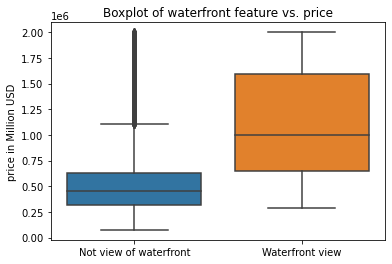

In [52]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df_less2['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in Million USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [53]:
waterfrontmean = df_less2[df_less2['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df_less2[df_less2['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1100167.45
The mean house price for a house without waterfront view is USD 516230.38


In [54]:
# Percentage of house with frontwater view
Water_percentage =len(df_less2[df_less2['waterfront'] == 1])/len(df_less2)*100
print ('Percentage of house have waterfront view is ' ,Water_percentage , "%")

Percentage of house have waterfront view is  0.5463460191454588 %


### Categorical features

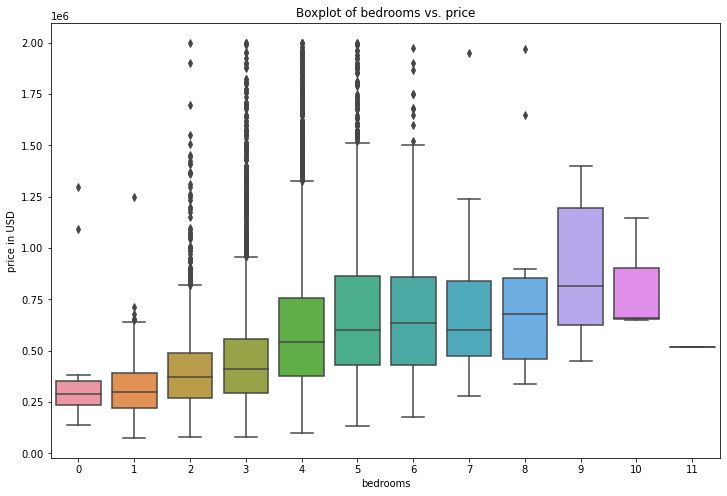

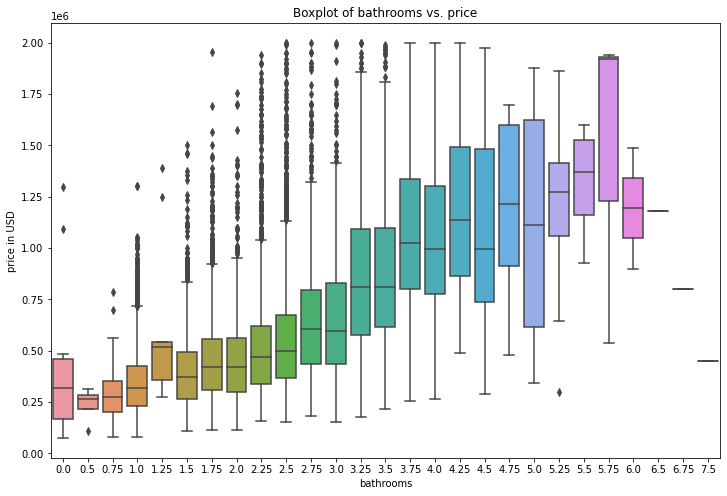

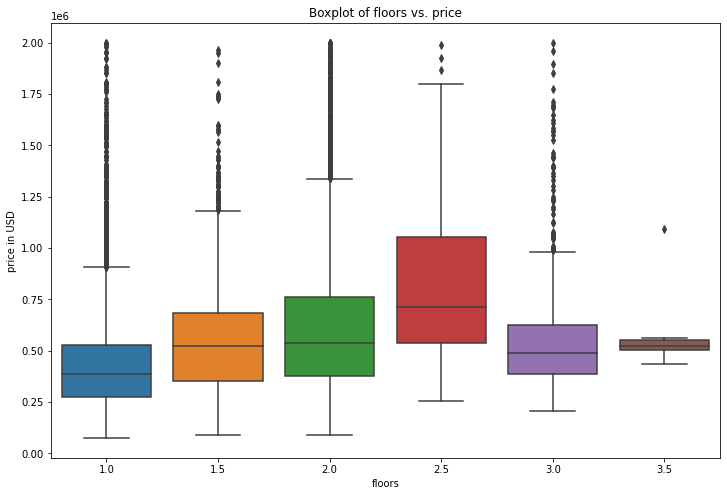

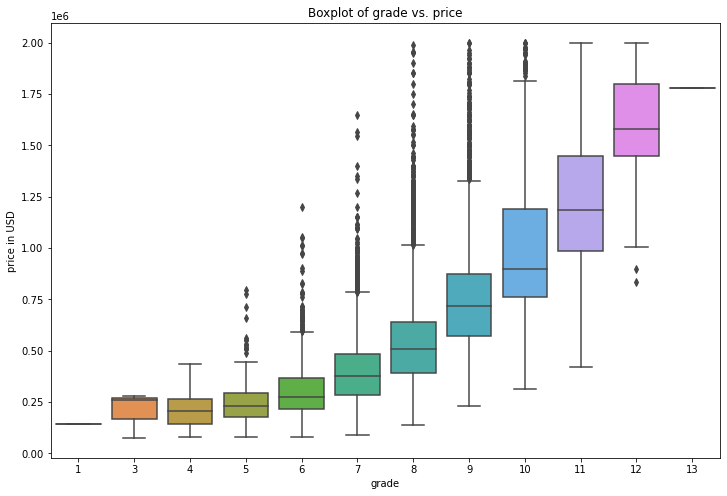

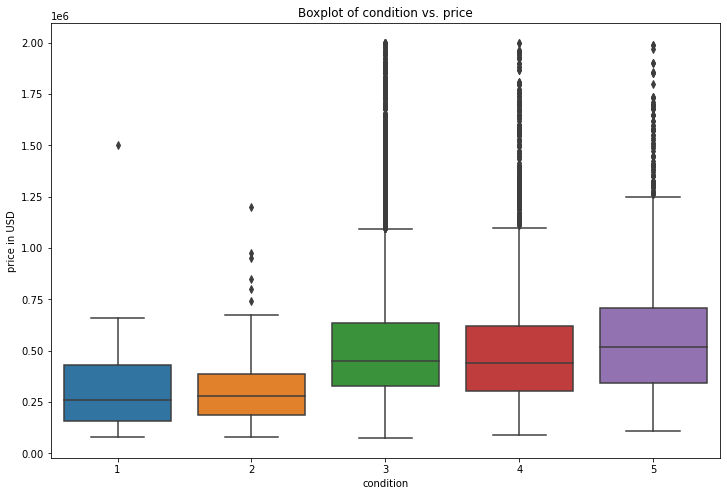

In [55]:
# Define categorical variables
categorical_features = ['bedrooms', 'bathrooms', 'floors','grade', 'condition']

# Plot boxplots
for feature in categorical_features:
    plt.figure(figsize = (12,8))
    sns.boxplot(x = df_less2[feature], y = df_less2['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

### Continuous features

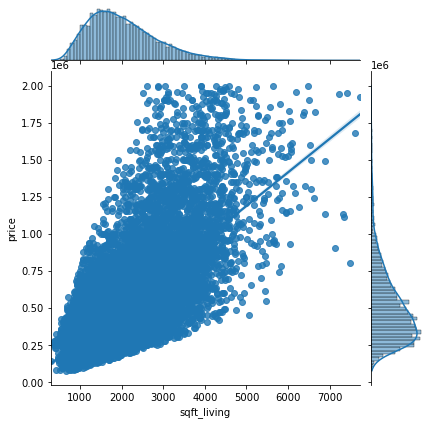

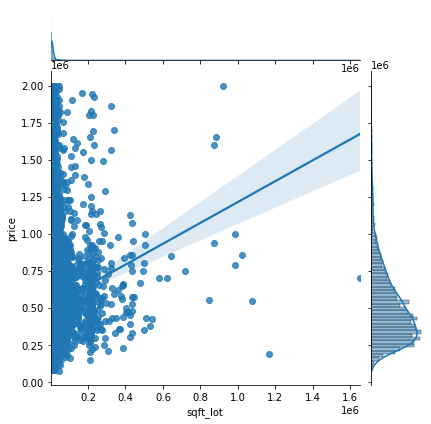

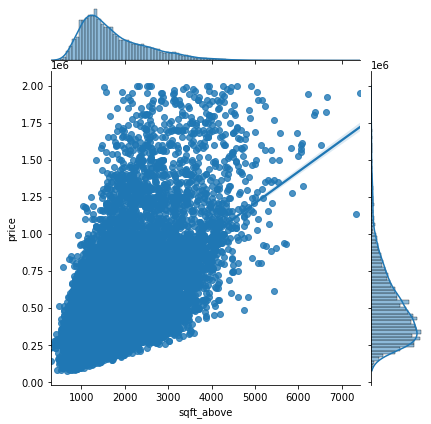

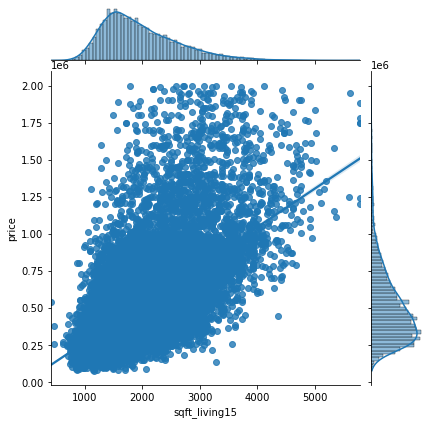

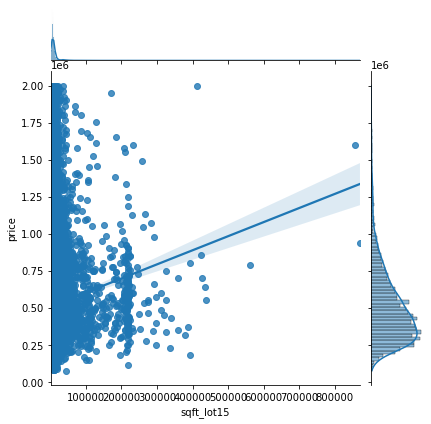

In [56]:
# Define list of continuous variables
continous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in continous_features:
    sns.jointplot(x = df_less2[feature], y = df_less2['price'], kind = 'reg')


## Selcect features and clean data

In [57]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [105]:
 df_clean = df_less2.drop(['id', 'date','sqft_lot',  
                           'sqft_lot15','floors','view','condition','lat', 'long',
                          'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',], axis = 1)

In [106]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,sqft_above,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,1340
1,538000.0,3,2.25,2570,0,7,2170,1690
2,180000.0,2,1.00,770,0,6,770,2720
3,604000.0,4,3.00,1960,0,7,1050,1360
4,510000.0,3,2.00,1680,0,8,1680,1800


## Train-Test Split Data

In [107]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
# Split features X and target y
X = df_clean.drop('price', axis = 1)
y = df_clean['price']

In [109]:
# Train-test split (10% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [110]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

19273 2142 19273 2142


### 1 Use sqft_living as a single feature to model

In [129]:
X_train_sq =np.array(X_train['sqft_living']).reshape(-1,1)


In [130]:
X_train_sq

array([[2430],
       [1580],
       [1310],
       ...,
       [1580],
       [1620],
       [1370]], dtype=int64)

In [113]:
y_train

4069      405000.0
19316     221347.0
5573      181000.0
240       225000.0
17108     540000.0
           ...    
11380     275000.0
12067    1195000.0
5444      325000.0
871       469950.0
15933     525000.0
Name: price, Length: 19273, dtype: float64

In [114]:
y_train_sq = np.array(y_train).reshape(-1,1)

In [115]:
y_train_sq

array([[405000.],
       [221347.],
       [181000.],
       ...,
       [325000.],
       [469950.],
       [525000.]])

In [116]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train_sq, y_train_sq)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train_sq,
            y_train_sq,
            cv=10,
            scoring="neg_mean_squared_error"
)

linreg_score =linreg.score(X_train_sq, y_train_sq)
rmse_scores = np.sqrt(-scores)
print ('rmse_scores', rmse_scores)
print ('rmse_scores.mean',rmse_scores.mean())
print ('rmse_scores.std', rmse_scores.std())
print ('intercept',linreg.intercept_)
print ('Score', linreg_score)

rmse_scores [203136.44376877 204549.22351231 214515.33954936 206773.5765634
 207888.28527315 213651.67590734 217339.36025237 211989.37904411
 219152.13472225 215275.19071385]
rmse_scores.mean 211427.06093069012
rmse_scores.std 5238.888812085091
intercept [53507.71883457]
Score 0.46186493848606835


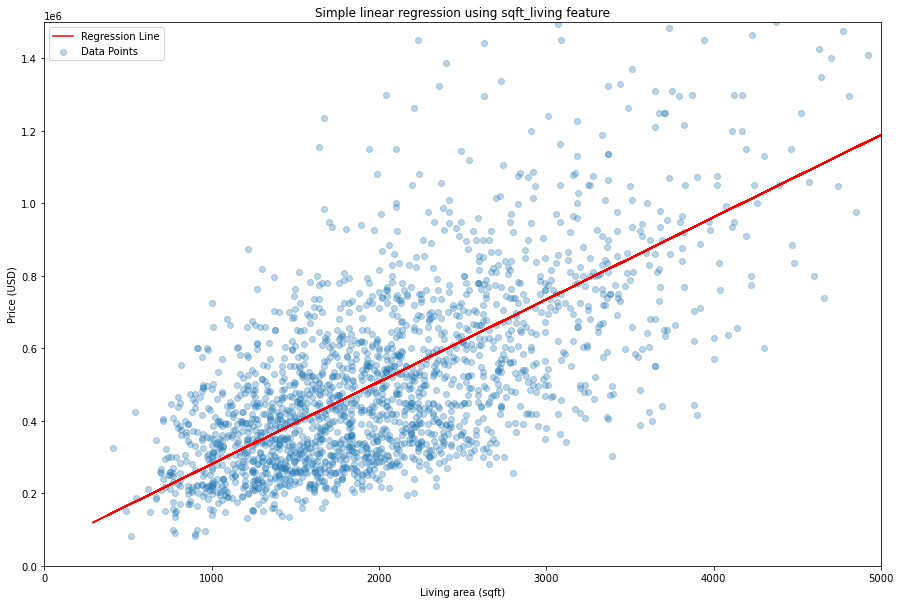

In [117]:

# Create visualisation of simple linear regression

# Get predictions
y_pred_sq = linreg.predict(X_train_sq)
# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_sq[:2000], y = y_train_sq[:2000], alpha = 0.3, label = 'Data Points')
plt.gca().set(xlim=(0.0, 5000), ylim=(0, 1500000) )
# Plot regression line
plt.plot(X_train_sq, y_pred_sq, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using sqft_living feature')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

In [71]:
X_test

,bedrooms,bathrooms,sqft_living,waterfront,grade
14437,3,2.0,1510,0,7
3310,3,2.5,2120,0,7
2905,3,1.5,1690,0,7
5214,4,3.5,3430,0,11
10933,3,1.0,1160,0,7
...,...,...,...,...,...
9777,3,2.0,2860,0,9
13891,3,1.0,1200,0,7
2049,2,2.0,1680,0,8
14860,3,2.0,1840,0,6


In [143]:
X_test_sq =np.array(X_test['sqft_living']).reshape(-1,1)

In [144]:
y_test_sq = np.array(y_test).reshape(-1,1)

In [145]:
y_pred_test_sq = linreg.predict(X_test_sq)

In [121]:
y_pred_test_sq[1]

array([535056.83169631])

In [122]:
y_test_sq[1]

array([400000.])

In [149]:
data_array = np.hstack([X_test_sq,y_test_sq,y_pred_test_sq])

In [150]:
data_array

array([[  1510.        , 234950.        , 399544.08851763],
       [  2120.        , 400000.        , 558134.58192725],
       [  1690.        , 430000.        , 446341.28329424],
       ...,
       [  1680.        , 575000.        , 443741.43913998],
       [  1840.        , 521000.        , 485338.94560808],
       [  1840.        , 300000.        , 485338.94560808]])

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


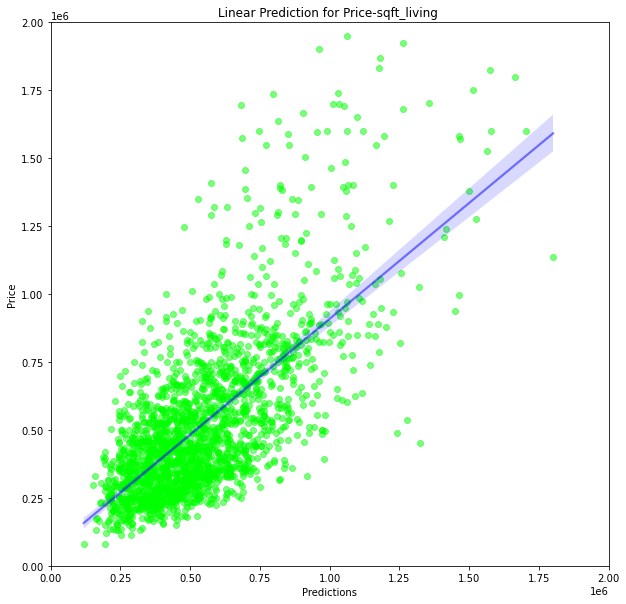

In [196]:
#Visualising the linear predicition for price
fig = plt.figure(figsize=(10,10))
sns.regplot(y_pred_test_sq,y_test_sq,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.title("Linear Prediction for Price-sqft_living ")
plt.savefig("Linear Prediction for Price-sqft_living.png")
plt.show()


### 2 Use number of bathrooms as a single feature to model

In [162]:
X_train_brooms =np.array(X_train['bathrooms']).reshape(-1,1)

In [163]:
X_train_brooms

array([[2.5 ],
       [2.  ],
       [1.  ],
       ...,
       [2.5 ],
       [2.25],
       [3.5 ]])

In [165]:
y_train_brooms=y_train_sq

In [166]:
y_train_brooms

array([[405000.],
       [221347.],
       [181000.],
       ...,
       [325000.],
       [469950.],
       [525000.]])

In [183]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train_brooms, y_train_brooms)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train_brooms,
            y_train_brooms,
            cv=10,
            scoring="neg_mean_squared_error"
)
linreg_score =linreg.score(X_train_brooms, y_train_brooms)
rmse_scores = np.sqrt(-scores)
print ('rmse_scores', rmse_scores)
print ('rmse_scores.mean',rmse_scores.mean())
print ('rmse_scores.std', rmse_scores.std())
print ('intercept',linreg.intercept_)
print ('Score', linreg_score)

rmse_scores [240608.18543178 241276.48756873 249325.73492694 239180.49149876
 249338.66971523 251035.64973098 257024.00717864 245287.76040346
 250051.98145434 259777.44679665]
rmse_scores.mean 248290.64147055155
rmse_scores.std 6490.424922160051
intercept [108730.07887762]
Score 0.2577807886034459


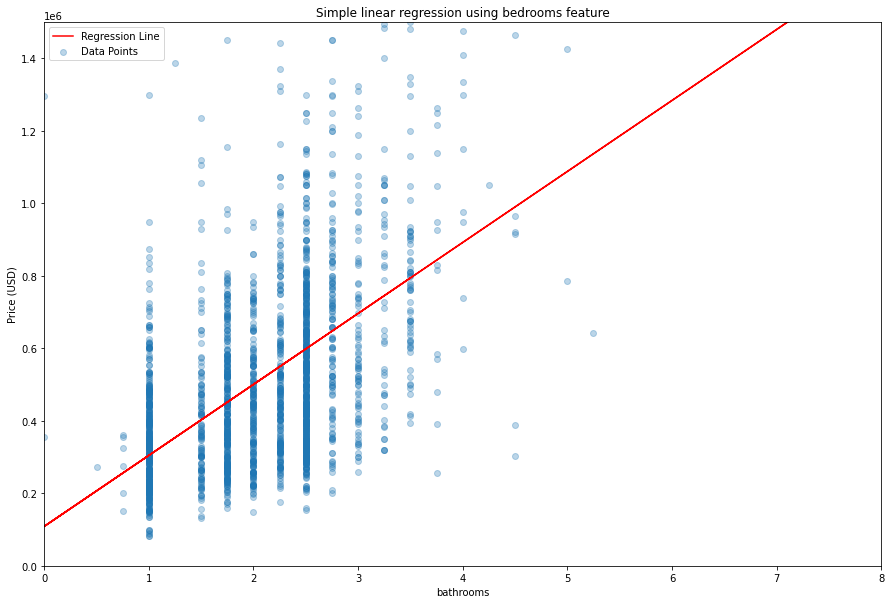

In [184]:

# Create visualisation of simple linear regression

# Get predictions
y_pred_brooms = linreg.predict(X_train_brooms)
# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_brooms[:2000], y = y_train_brooms[:2000], alpha = 0.3, label = 'Data Points')
plt.gca().set(xlim=(0.0, 8), ylim=(0, 1500000) )
# Plot regression line
plt.plot(X_train_brooms, y_pred_brooms, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using bedrooms feature')
plt.xlabel('bathrooms')
plt.ylabel('Price (USD)')
plt.show()

In [193]:
X_test_brooms =np.array(X_test['bathrooms']).reshape(-1,1)
y_pred_test_brooms = linreg.predict(X_test_brooms)
y_test_sq = np.array(y_test).reshape(-1,1)

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


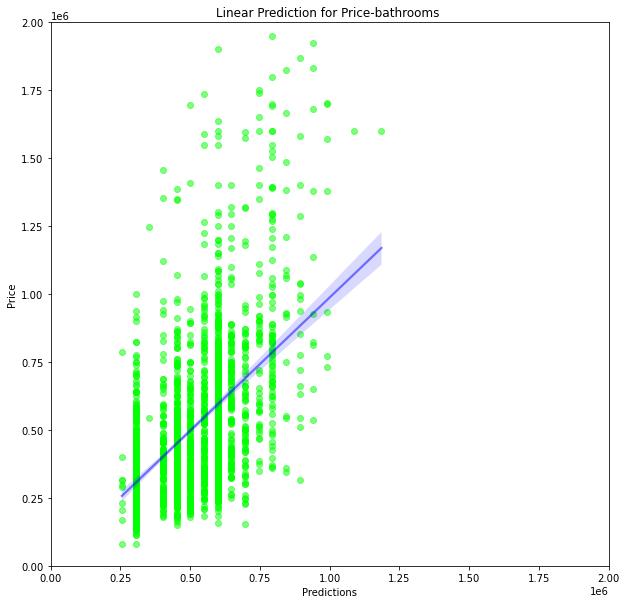

In [229]:
#Visualising the linear predicition for price
fig = plt.figure(figsize=(10,10))
sns.regplot(y_pred_test_brooms,y_test_sq,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.title("Linear Prediction for Price-bathrooms ")
plt.savefig("Linear Prediction for Price-bathrooms.png")
plt.show()

### 3 Use sqft_living15 as a single feature to model

In [128]:
X_train_sq15 =np.array(X_train['sqft_living15']).reshape(-1,1)


In [131]:
y_train_sq15=y_train_sq

In [132]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train_sq15, y_train_sq15)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train_sq15,
            y_train_sq15,
            cv=10,
            scoring="neg_mean_squared_error"
)

linreg_score =linreg.score(X_train_sq15, y_train_sq15)
rmse_scores = np.sqrt(-scores)
print ('rmse_scores', rmse_scores)
print ('rmse_scores.mean',rmse_scores.mean())
print ('rmse_scores.std', rmse_scores.std())
print ('intercept',linreg.intercept_)
print ('Score_Squre Living 15', linreg_score)

rmse_scores [226366.74718832 219736.68264167 232884.48571081 227044.27201789
 227268.84719249 231283.41197312 236420.40454105 226432.14553892
 233705.1219182  235472.70958804]
rmse_scores.mean 229661.48283104986
rmse_scores.std 4911.037127891825
intercept [6967.62122497]
Score_Squre Living 15 0.3651317234047471


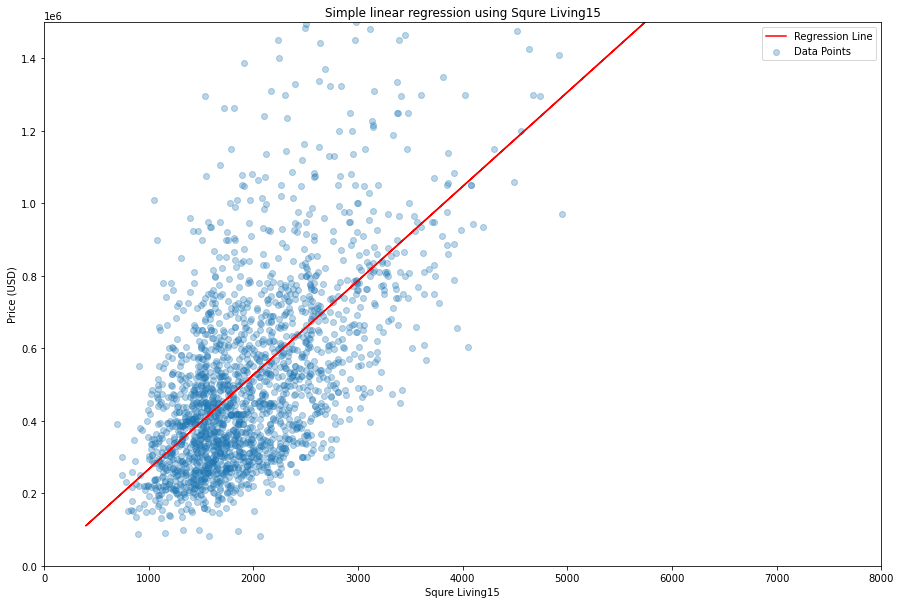

In [137]:
# Create visualisation of simple linear regression

# Get predictions
y_pred_sq15 = linreg.predict(X_train_sq15)
# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_sq15[:2000], y = y_train_sq15[:2000], alpha = 0.3, label = 'Data Points')
plt.gca().set(xlim=(0.0, 8000), ylim=(0, 1500000) )
# Plot regression line
plt.plot(X_train_sq15, y_pred_sq15, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Squre Living15')
plt.xlabel('Squre Living15')
plt.ylabel('Price (USD)')
plt.show()

In [138]:
X_test

,bedrooms,bathrooms,sqft_living,waterfront,grade,sqft_above,sqft_living15
14437,3,2.0,1510,0,7,1510,1780
3310,3,2.5,2120,0,7,2120,2250
2905,3,1.5,1690,0,7,1690,1570
5214,4,3.5,3430,0,11,3430,3880
10933,3,1.0,1160,0,7,1160,1620
...,...,...,...,...,...,...,...
9777,3,2.0,2860,0,9,1700,1460
13891,3,1.0,1200,0,7,1200,1220
2049,2,2.0,1680,0,8,1680,1900
14860,3,2.0,1840,0,6,1840,2010


In [142]:
X_test_sq15 =np.array(X_test['sqft_living15']).reshape(-1,1)

In [146]:
y_pred_test_sq15 = linreg.predict(X_test_sq15)

In [148]:
data_array_sq15 = np.hstack([X_test_sq15,y_test_sq,y_pred_test_sq15])

In [151]:
data_array_sq15

array([[  1780.        , 234950.        , 469739.88068254],
       [  2250.        , 400000.        , 591932.55593257],
       [  1570.        , 430000.        , 415143.15344316],
       ...,
       [  1900.        , 575000.        , 500938.01053361],
       [  2010.        , 521000.        , 529536.29623043],
       [  2030.        , 300000.        , 534735.98453894]])

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


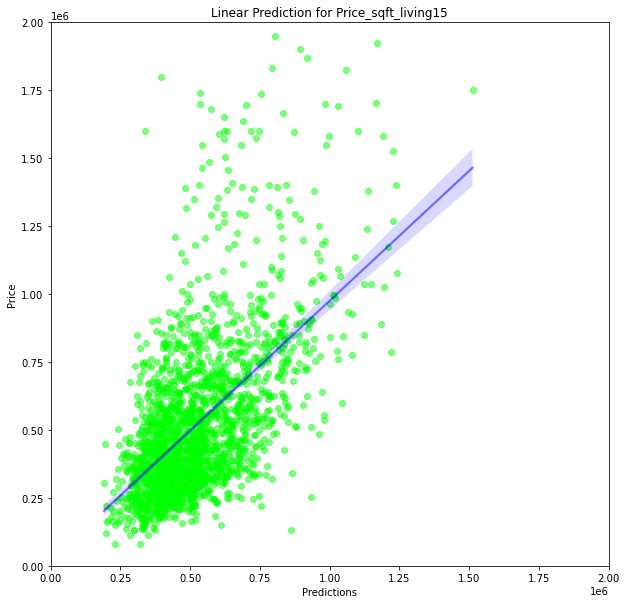

In [198]:
#Visualising the linear predicition for price
fig = plt.figure(figsize=(10,10))
sns.regplot(y_pred_test_sq15,y_test_sq,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.title("Linear Prediction for Price_sqft_living15")
plt.savefig("Linear Prediction for Price-sqft_living15.png")
plt.show()

In [153]:
rmse = np.sqrt(mean_squared_error(y_pred_test_sq15,y_test_sq))

In [154]:
print (rmse)

231765.94376347592


### 4 Use grade as a single feature to model

In [155]:
X_train_grade =np.array(X_train['grade']).reshape(-1,1)

In [156]:
X_train_grade

array([[9],
       [6],
       [7],
       ...,
       [7],
       [7],
       [8]], dtype=int64)

In [157]:
y_train_grade=y_train_sq

In [159]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train_grade, y_train_grade)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train_grade,
            y_train_grade,
            cv=10,
            scoring="neg_mean_squared_error"
)

linreg_score =linreg.score(X_train_grade, y_train_grade)
rmse_scores = np.sqrt(-scores)
print ('rmse_scores', rmse_scores)
print ('rmse_scores.mean',rmse_scores.mean())
print ('rmse_scores.std', rmse_scores.std())
print ('intercept',linreg.intercept_)
print ('Score_grade', linreg_score)

rmse_scores [205704.48417325 205623.21270621 209132.12415452 208061.06292276
 206772.67274245 217534.99515808 218240.69400348 206347.92768032
 218749.61114146 214615.15114545]
rmse_scores.mean 211078.1935827983
rmse_scores.std 5261.075679503402
intercept [-791268.71978938]
Score_grade 0.463645713463514


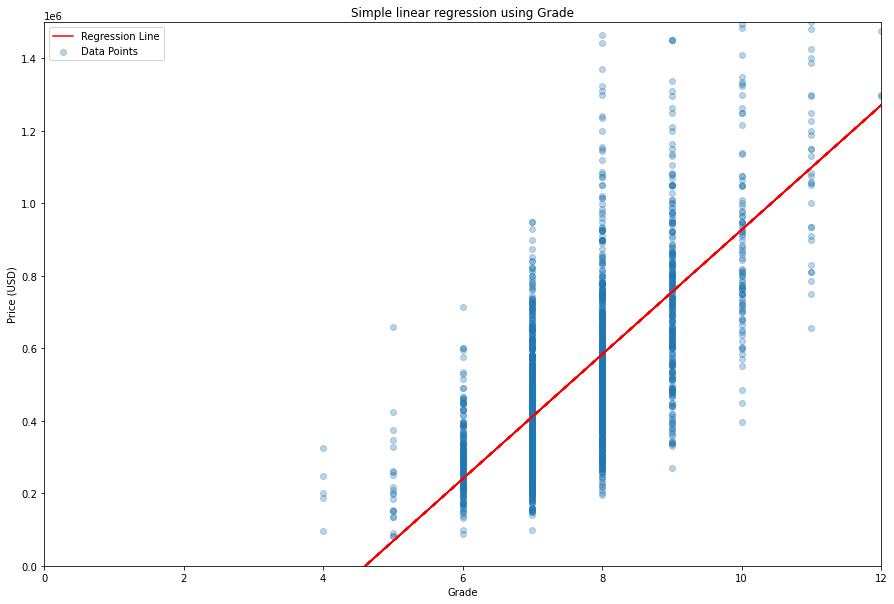

In [161]:
# Create visualisation of simple linear regression

# Get predictions
y_pred_grade= linreg.predict(X_train_grade)
# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_grade[:2000], y = y_train_grade[:2000], alpha = 0.3, label = 'Data Points')
plt.gca().set(xlim=(0,12), ylim=(0, 1500000) )
# Plot regression line
plt.plot(X_train_grade, y_pred_grade, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Grade')
plt.xlabel('Grade')
plt.ylabel('Price (USD)')
plt.show()

In [200]:
X_test_grade =np.array(X_test['grade']).reshape(-1,1)
y_pred_test_grade = linreg.predict(X_test_grade)

In [202]:
y_pred_test_grade

array([[1479834.72747949],
       [1479834.72747949],
       [1479834.72747949],
       ...,
       [1675706.8201369 ],
       [1283962.63482208],
       [1675706.8201369 ]])

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


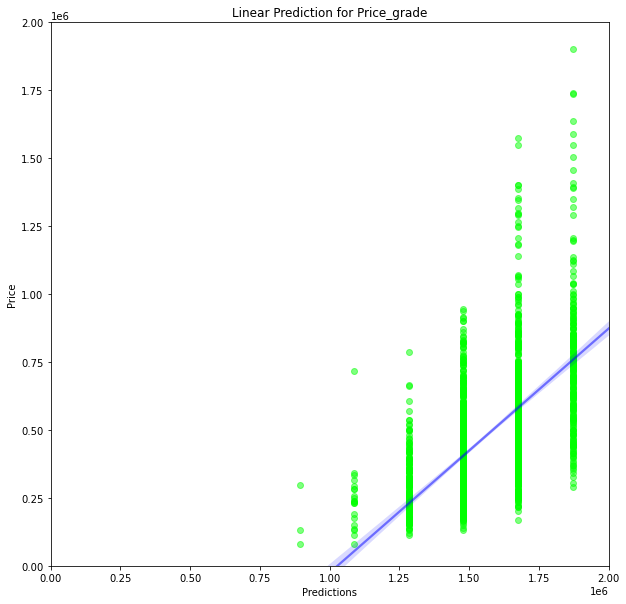

In [201]:
#Visualising the linear predicition for price
fig = plt.figure(figsize=(10,10))
sns.regplot(y_pred_test_grade,y_test_sq,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.title("Linear Prediction for Price_grade")
plt.savefig("Linear Prediction for Price-grade.png")
plt.show()

### 5 Use sqft_above as a single feature to model

In [220]:
X_train_sqabove =np.array(X_train['sqft_above']).reshape(-1,1)

In [221]:
y_train_sqabove = y_train_sq

In [222]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train_sqabove, y_train_sqabove)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train_sqabove,
            y_train_sqabove,
            cv=10,
            scoring="neg_mean_squared_error"
)

linreg_score =linreg.score(X_train_sqabove, y_train_sqabove)
rmse_scores = np.sqrt(-scores)
print ('rmse_scores', rmse_scores)
print ('rmse_scores.mean',rmse_scores.mean())
print ('rmse_scores.std', rmse_scores.std())
print ('intercept',linreg.intercept_)
print ('Score_Squre above', linreg_score)

rmse_scores [224238.94858951 226616.34595899 239424.65129839 231276.36850882
 231855.59867788 235075.55139449 239455.95481854 231747.39149129
 239072.36823843 241023.3714935 ]
rmse_scores.mean 233978.65504698237
rmse_scores.std 5498.095564503213
intercept [143929.26202239]
Score_Squre above 0.34106105524095787


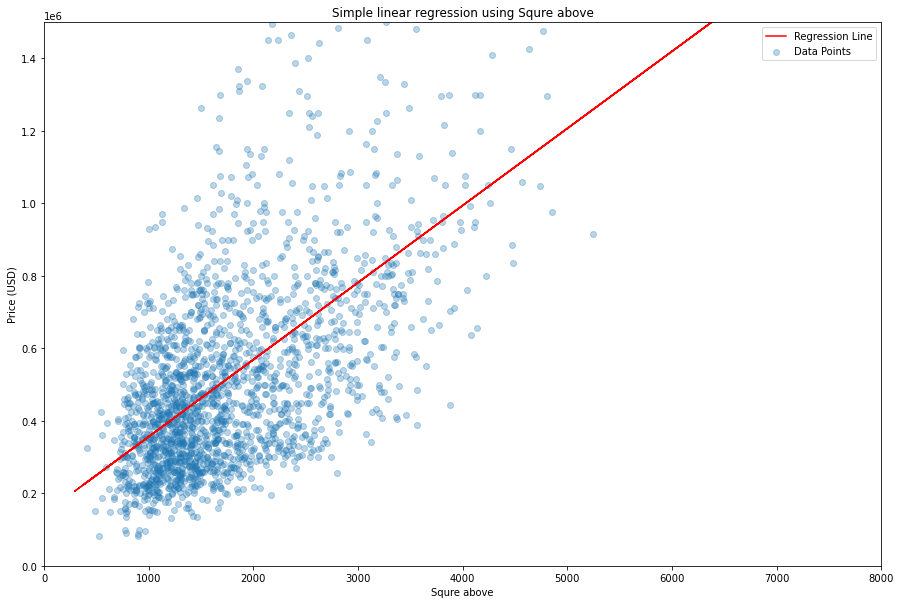

In [223]:

# Get predictions
y_pred_sqabove = linreg.predict(X_train_sqabove)
# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_sqabove[:2000], y = y_train_sqabove[:2000], alpha = 0.3, label = 'Data Points')
plt.gca().set(xlim=(0.0, 8000), ylim=(0, 1500000) )
# Plot regression line
plt.plot(X_train_sqabove, y_pred_sqabove, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Squre above')
plt.xlabel('Squre above')
plt.ylabel('Price (USD)')
plt.show()

In [224]:
X_test_sqabove =np.array(X_test['sqft_above']).reshape(-1,1)
y_pred_test_sqabove = linreg.predict(X_test_sqabove)

In [225]:
X_test_sqabove

array([[1510],
       [2120],
       [1690],
       ...,
       [1680],
       [1840],
       [1840]], dtype=int64)

In [226]:
y_pred_test_sqabove 

array([[464942.85709414],
       [594623.84583173],
       [503209.37836097],
       ...,
       [501083.46051281],
       [535098.14608333],
       [535098.14608333]])

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


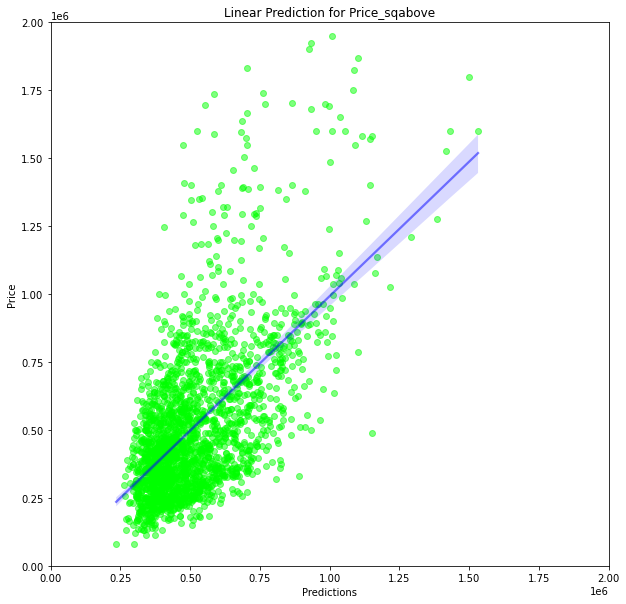

In [228]:
#Visualising the linear predicition for price
fig = plt.figure(figsize=(10,10))
sns.regplot(y_pred_test_sqabove,y_test_sq,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.title("Linear Prediction for Price_sqabove")
plt.savefig("Linear Prediction for Price-sqabove.png")
plt.show()

### Conclusion 

The parameter square living area and grade have a better score and lower MSE. These results are consistent with the correlation level calculated in the previous section. However, the MSE is relatively high for all five parameters. 